In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1994 non-null   int64  
 1   timestamp             1994 non-null   object 
 2   source                1994 non-null   object 
 3   text                  1994 non-null   object 
 4   expanded_urls         1994 non-null   object 
 5   name                  1994 non-null   object 
 6   favorites             1994 non-null   int64  
 7   retweets              1994 non-null   int64  
 8   jpg_url               1994 non-null   object 
 9   dog_stage             1994 non-null   object 
 10  prediction_algorithm  1686 non-null   object 
 11  confidence_level      1994 non-null   float64
 12  rating                1993 non-null   float64
 13  dog_count             1994 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 218.2+ KB


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [5]:
df.head()

,tweet_id,source,text,expanded_urls,name,favorites,retweets,jpg_url,dog_stage,prediction_algorithm,confidence_level,rating,dog_count
timestamp,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,39246,8760,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,13.0,1.0
2017-08-01 00:17:27,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,33609,6422,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None,Chihuahua,0.323581,13.0,1.0
2017-07-31 00:18:03,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,25318,4265,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None,Chihuahua,0.716012,12.0,1.0
2017-07-30 15:58:51,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,42611,8850,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,None,Labrador_retriever,0.168086,13.0,1.0
2017-07-29 16:00:24,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,40779,9634,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,None,basset,0.555712,12.0,1.0


### Using the correlation map to see the relationships between variables

Text(0.5, 1, 'Correlation Map')

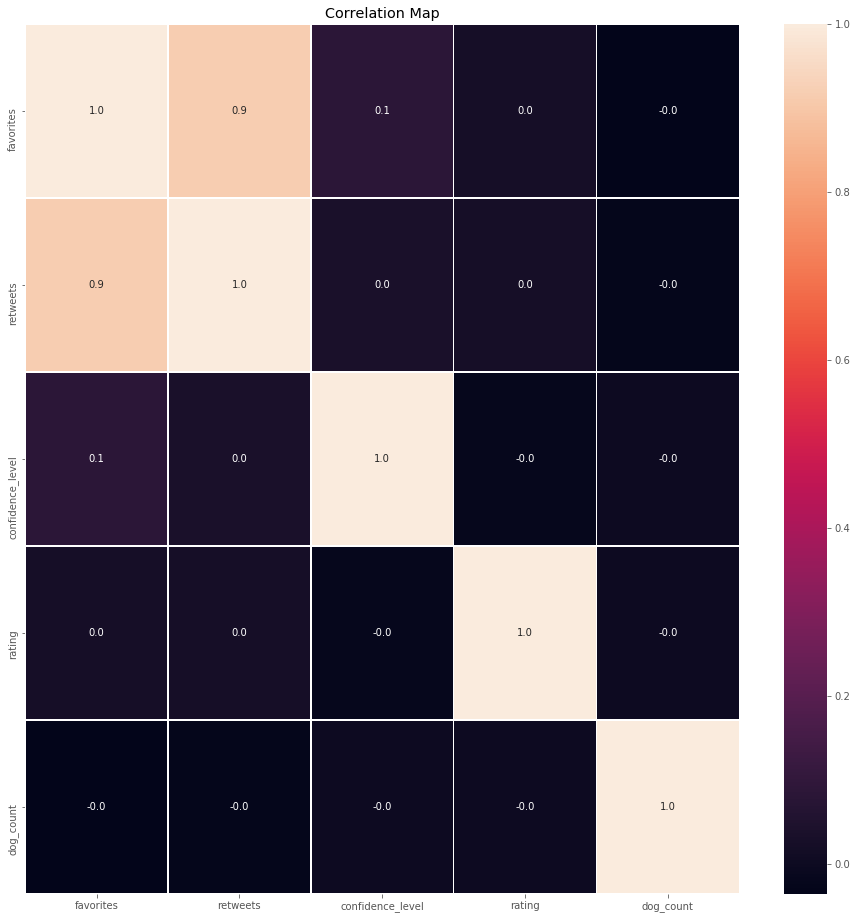

In [6]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df[['favorites','retweets',
                'confidence_level','rating', 'dog_count']].corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- From above correlation map we can see that only the relationship between favorites and retweets is strong positive.
- The relationship between favorities and confidence_level is positive but weak.

### The Relationship Between Favorites and Retweets

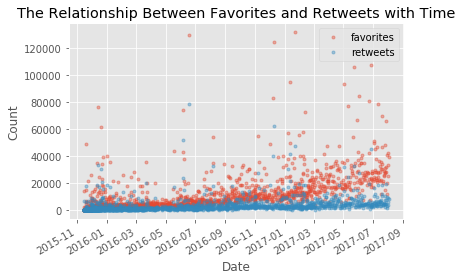

In [52]:
df[['favorites', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('The Relationship Between Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

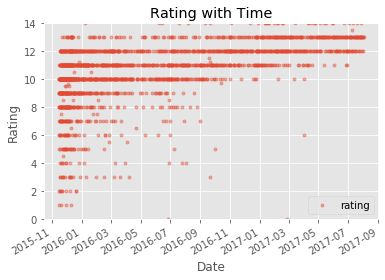

In [53]:
df.plot(y ='rating', ylim=[0,14], style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

- According to above analyses we can see that retweets and favorites have strong postive relationship. In other words, if the dog will get more favorities and retweets with higher rating if the dog is getting better. However, we didnt see the relationship between rating and retweets or rating and favorites is strong and positive.

/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


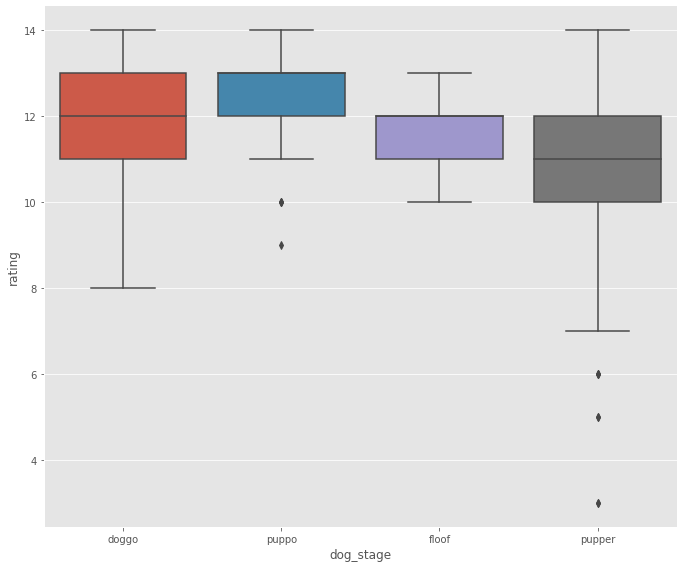

In [54]:
sns.factorplot(kind='box',        
               y='rating',       
               x='dog_stage',  
               data=df[df['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.2,   
               legend_out=False)

- According the above analysis, we found that pupper has lower rating and puppo has higher rating. And puppo has higher rating. 

In [55]:
df.groupby('dog_stage').rating.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1624.0,11.766882,45.025499,0.0,10.0,11.0,12.0,1776.0
doggo,69.0,11.797101,1.510548,8.0,11.0,12.0,13.0,14.0
floof,34.0,11.705882,0.759961,10.0,11.0,12.0,12.0,13.0
pupper,237.0,10.616160,1.833623,3.0,10.0,11.0,12.0,14.0
puppo,29.0,12.172414,1.197288,9.0,12.0,13.0,13.0,14.0


- In the previous analysis, we found that pupper has lower rating and puppo has higher rating. So I tried to get more insight from above table. And we can see that although pupper has lower mean for rating, but the count for pupper is highest except none. The count of puppo is lowest although it has the highest mean for rating. For the rest of the dog stage, we do see that the counts are also significantly lower than pupper. So I think it will be fair to compare once we have more counts for doggo, floof and puppo.